In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("final_pubmed_v3.csv")

In [2]:
df.head()

,Unnamed: 0,Title,Abstract,Journal,Language,Year,Month,Authors,Affiliations,Name,...,Impact_Factor,Impact_Factor_5Years,Journal_Category,Universities,Study_Type_Extracted,Standardized_University,Rank,Research_Score,Rank_Median,Research_Score_Category
0,0,prevalence and association of sleep duration a...,this study aimed to examine the prevalence of ...,bmc public health,eng,2024,Nov,"Zhou Zigui, Tian Xuewen","school of exercise and health, shanghai univer...",bmc public health,...,3.5,3.9,"PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH|Q1...","school of exercise and health, shanghai univer...",Unknown,shanghai university,501–600,38.0,550.5,Low (0-50)
1,1,the impact of pparγ and apoe gene polymorphism...,"globally, diabetic kidney disease (dkd) has be...",bmc nephrology,eng,2024,Nov,"Taurbekova Binura, Mukhtarova Kymbat, Salpynov...","department of biomedical sciences, school of m...",bmc nephrology,...,2.2,2.6,UROLOGY & NEPHROLOGY|Q2|54/126,"school of medicine, nazarbayev university, sch...",meta-analysis,nazarbayev university,501–600,29.5,550.5,Low (0-50)
2,2,immune checkpoint landscape of human atheroscl...,immune checkpoint inhibitor (ici) therapies ca...,nature cardiovascular research,eng,2024,Nov,"Barcia Durán José Gabriel, Das Dayasagar, Gild...","nyu cardiovascular research center, division o...",nature cardiovascular research,...,9.4,9.4,CARDIAC & CARDIOVASCULAR SYSTEMS|Q1|13/220,"nyu cardiovascular research center, department...",clinical development,york university,351–400,32.4,375.5,Low (0-50)
3,3,ezrin drives adaptation of monocytes to the in...,"ezrin, an actin-binding protein, orchestrates ...",cell death & disease,eng,2024,Nov,"Gudneppanavar Ravindra, Di Pietro Caterina, H ...","department of pediatrics, school of medicine, ...",cell death & disease,...,8.1,8.6,CELL BIOLOGY|Q1|33/205,"school of medicine, yale university, school of...",Unknown,yale university,10,94.9,10.0,High (75-100)
4,4,determining the quality of life and associated...,this study aimed to determine the quality of l...,journal of tissue viability,eng,2024,Nov,"Gül Şenay, Demir Ayşe Sılanur, Karadağ Ayişe, ...","faculty of nursing, hacettepe university, anka...",journal of tissue viability,...,2.4,2.9,NURSING|Q1|35/191,"hacettepe university, koc university, school o...",Unknown,hacettepe university,601–800,26.8,700.5,Low (0-50)


Profiling GMM Clusters
Cluster Profiles for GMM_Cluster:

             Impact_Factor_5Years  Research_Score
GMM_Cluster                                      
0                        3.358442       28.812121
1                        5.511864       63.382627
2                       21.829545       63.150000
Silhouette Score for GMM Clustering: 0.3877705258707141


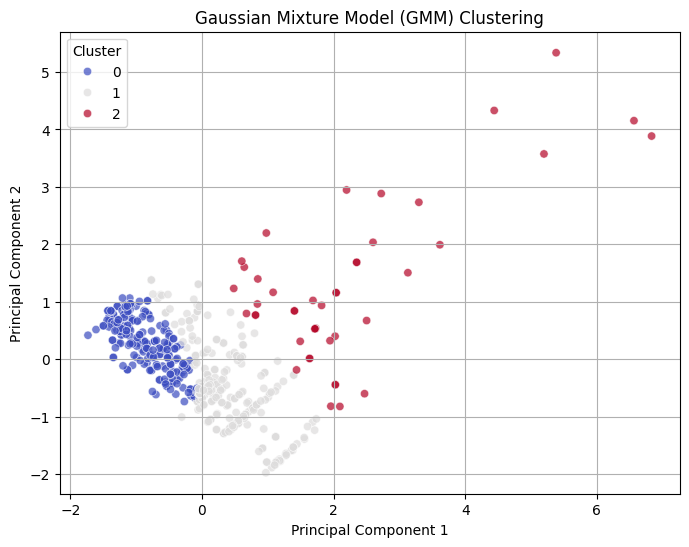

In [3]:
# Preprocessing: Select relevant numerical features and handle missing values
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# Define numerical features
numerical_features = ['Impact_Factor_5Years', 'Research_Score']  # Replace with your actual column names

data_subset = df[numerical_features].copy()
#data_subset = data_subset.fillna(data_subset.mean())  # Fill missing values with mean (or other strategy)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Step 2: Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
df['GMM_Cluster'] = gmm_labels

# Step 3: Profile the Clusters
def profile_clusters(data, cluster_col, features):
    cluster_profiles = data.groupby(cluster_col)[features].mean()
    print(f"Cluster Profiles for {cluster_col}:\n")
    print(cluster_profiles)
    return cluster_profiles

# Profile GMM Clusters
print("Profiling GMM Clusters")
gmm_profiles = profile_clusters(df, 'GMM_Cluster', numerical_features)

# Evaluate GMM Clustering
silhouette_gmm = silhouette_score(data_scaled, gmm_labels)
print(f"Silhouette Score for GMM Clustering: {silhouette_gmm}")

# Visualize GMM Clusters
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=gmm_labels, palette='coolwarm', alpha=0.7)
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


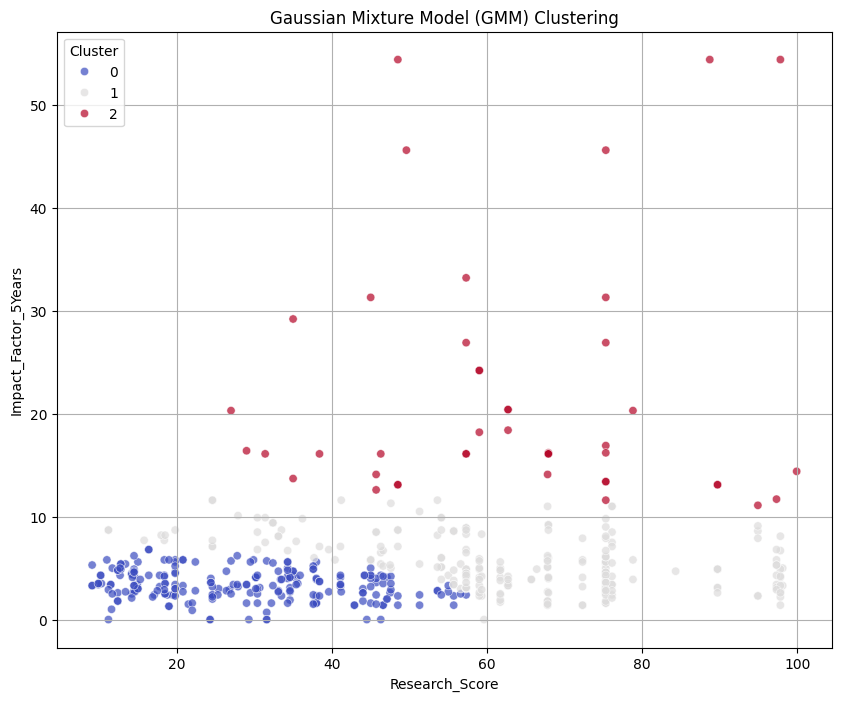

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming GMM clustering has already been performed and labels are in 'GMM_Cluster'
# Replace 'Feature1' and 'Feature2' with the names of the original features to plot
feature_x = 'Research_Score'  # X-axis feature
feature_y = 'Impact_Factor_5Years'        # Y-axis feature

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df[feature_x], 
    y=df[feature_y], 
    hue=df['GMM_Cluster'], 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Gaussian Mixture Model (GMM) Clustering')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [5]:
# Calculate total variance for each feature
total_variance = df[numerical_features].var()

# Calculate between-cluster variance
cluster_means = gmm_profiles.mean(axis=0)
between_cluster_variance = gmm_profiles.var()

# Calculate within-cluster variance
within_cluster_variance = total_variance - between_cluster_variance

# Calculate importance ratios
importance_ratios = between_cluster_variance / total_variance

# Normalize importance ratios to sum to 1
weights = importance_ratios / importance_ratios.sum()

print("Feature Weights Based on Cluster-Centric Variance Ratios:")
print(weights)

# Develop the scoring equation
impact_factor_weight = weights['Impact_Factor_5Years']
research_score_weight = weights['Research_Score']
#rank_median_weight = weights['Rank_Median']

print("\nScoring Equation:")
#print(f"Score = {impact_factor_weight:.4f} * Impact_Factor_5Years + "
      #f"{research_score_weight:.4f} * Research_Score - "
      #f"{rank_median_weight:.4f} * Rank_Median")


Feature Weights Based on Cluster-Centric Variance Ratios:
Impact_Factor_5Years    0.784521
Research_Score          0.215479
dtype: float64

Scoring Equation:


In [8]:
# Calculate the scoring equation
df['Score'] = (
    impact_factor_weight * df['Impact_Factor_5Years'] +
    research_score_weight * df['Research_Score'] 
    #rank_median_weight * df['Rank_Median']
)

# Extract top 10 studies based on score
top_studies = df.nlargest(10, 'Score')[['Title', 'Study_Type_Extracted', 'Standardized_University', 'Journal', 'Score']]

# Print the top 10 studies with additional information
print("Top 10 Studies:\n")
print(top_studies)

Top 10 Studies:

                                                 Title  \
231  author correction: intravenous and intracrania...   
44   fungal symbiont transmitted by free-living mic...   
340  study design features increase replicability i...   
225  integrative mapping of human cd8<sup>+</sup> t...   
472  probe set selection for targeted spatial trans...   
203  pd-1/pd-l1 immune checkpoint blockade in breas...   
299  hypoxia-inducible factor 2α promotes pathogeni...   
288  a clinical study of autologous chimeric antige...   
201  cancer liquid biopsies by oxford nanopore tech...   
289  personalized nanovaccines for treating solid c...   

                 Study_Type_Extracted Standardized_University  \
231                           Unknown     stanford university   
44                            Unknown      cornell university   
340    brain-wide association studies   vanderbilt university   
225                        68 studies     zhejiang university   
472                

In [9]:
df.head()

,Unnamed: 0,Title,Abstract,Journal,Language,Year,Month,Authors,Affiliations,Name,...,Journal_Category,Universities,Study_Type_Extracted,Standardized_University,Rank,Research_Score,Rank_Median,Research_Score_Category,GMM_Cluster,Score
0,0,prevalence and association of sleep duration a...,this study aimed to examine the prevalence of ...,bmc public health,eng,2024,Nov,"Zhou Zigui, Tian Xuewen","school of exercise and health, shanghai univer...",bmc public health,...,"PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH|Q1...","school of exercise and health, shanghai univer...",Unknown,shanghai university,501–600,38.0,550.5,Low (0-50),0,11.247839
1,1,the impact of pparγ and apoe gene polymorphism...,"globally, diabetic kidney disease (dkd) has be...",bmc nephrology,eng,2024,Nov,"Taurbekova Binura, Mukhtarova Kymbat, Salpynov...","department of biomedical sciences, school of m...",bmc nephrology,...,UROLOGY & NEPHROLOGY|Q2|54/126,"school of medicine, nazarbayev university, sch...",meta-analysis,nazarbayev university,501–600,29.5,550.5,Low (0-50),0,8.396389
2,2,immune checkpoint landscape of human atheroscl...,immune checkpoint inhibitor (ici) therapies ca...,nature cardiovascular research,eng,2024,Nov,"Barcia Durán José Gabriel, Das Dayasagar, Gild...","nyu cardiovascular research center, division o...",nature cardiovascular research,...,CARDIAC & CARDIOVASCULAR SYSTEMS|Q1|13/220,"nyu cardiovascular research center, department...",clinical development,york university,351–400,32.4,375.5,Low (0-50),1,14.356020
3,3,ezrin drives adaptation of monocytes to the in...,"ezrin, an actin-binding protein, orchestrates ...",cell death & disease,eng,2024,Nov,"Gudneppanavar Ravindra, Di Pietro Caterina, H ...","department of pediatrics, school of medicine, ...",cell death & disease,...,CELL BIOLOGY|Q1|33/205,"school of medicine, yale university, school of...",Unknown,yale university,10,94.9,10.0,High (75-100),1,27.195850
4,4,determining the quality of life and associated...,this study aimed to determine the quality of l...,journal of tissue viability,eng,2024,Nov,"Gül Şenay, Demir Ayşe Sılanur, Karadağ Ayişe, ...","faculty of nursing, hacettepe university, anka...",journal of tissue viability,...,NURSING|Q1|35/191,"hacettepe university, koc university, school o...",Unknown,hacettepe university,601–800,26.8,700.5,Low (0-50),0,8.049951


In [10]:
df['Tier'] = pd.qcut(df['Score'], q=3, labels=['Low', 'Medium', 'High'])
df.head()

,Unnamed: 0,Title,Abstract,Journal,Language,Year,Month,Authors,Affiliations,Name,...,Universities,Study_Type_Extracted,Standardized_University,Rank,Research_Score,Rank_Median,Research_Score_Category,GMM_Cluster,Score,Tier
0,0,prevalence and association of sleep duration a...,this study aimed to examine the prevalence of ...,bmc public health,eng,2024,Nov,"Zhou Zigui, Tian Xuewen","school of exercise and health, shanghai univer...",bmc public health,...,"school of exercise and health, shanghai univer...",Unknown,shanghai university,501–600,38.0,550.5,Low (0-50),0,11.247839,Medium
1,1,the impact of pparγ and apoe gene polymorphism...,"globally, diabetic kidney disease (dkd) has be...",bmc nephrology,eng,2024,Nov,"Taurbekova Binura, Mukhtarova Kymbat, Salpynov...","department of biomedical sciences, school of m...",bmc nephrology,...,"school of medicine, nazarbayev university, sch...",meta-analysis,nazarbayev university,501–600,29.5,550.5,Low (0-50),0,8.396389,Low
2,2,immune checkpoint landscape of human atheroscl...,immune checkpoint inhibitor (ici) therapies ca...,nature cardiovascular research,eng,2024,Nov,"Barcia Durán José Gabriel, Das Dayasagar, Gild...","nyu cardiovascular research center, division o...",nature cardiovascular research,...,"nyu cardiovascular research center, department...",clinical development,york university,351–400,32.4,375.5,Low (0-50),1,14.356020,Medium
3,3,ezrin drives adaptation of monocytes to the in...,"ezrin, an actin-binding protein, orchestrates ...",cell death & disease,eng,2024,Nov,"Gudneppanavar Ravindra, Di Pietro Caterina, H ...","department of pediatrics, school of medicine, ...",cell death & disease,...,"school of medicine, yale university, school of...",Unknown,yale university,10,94.9,10.0,High (75-100),1,27.195850,High
4,4,determining the quality of life and associated...,this study aimed to determine the quality of l...,journal of tissue viability,eng,2024,Nov,"Gül Şenay, Demir Ayşe Sılanur, Karadağ Ayişe, ...","faculty of nursing, hacettepe university, anka...",journal of tissue viability,...,"hacettepe university, koc university, school o...",Unknown,hacettepe university,601–800,26.8,700.5,Low (0-50),0,8.049951,Low


In [19]:
def extract_high_tier_abstracts(df, tier_column, abstract_column, output_file):
    # Filter for "High" tier and exclude rows with "no abstract"
    high_tier_df = df[(df[tier_column] == 'High') & (df[abstract_column].str.lower() != 'no abstract')]
    
    # Sort by score and select top 10
    top_abstracts = high_tier_df.nlargest(10, 'Score')[abstract_column]
    
    # Save abstracts to a .txt file
    with open(output_file, 'w') as file:
        for i, abstract in enumerate(top_abstracts, 1):
            file.write(f"Abstract {i}:\n{abstract}\n\n")
    print(f"Saved top 10 abstracts to {output_file}")


In [20]:
tier_column = 'Tier'
abstract_column = 'Abstract'
output_abstracts_file = 'top_10_abstracts.txt'
extract_high_tier_abstracts(df, tier_column, abstract_column, output_abstracts_file)


Saved top 10 abstracts to top_10_abstracts.txt
